Quantidade de nós no grafo: 4575
Modularidade da partição: 0.42819473065651725
Número de nós nas 10 maiores comunidades:
Comunidade 4: 916 nós
Comunidade 0: 868 nós
Comunidade 5: 743 nós
Comunidade 2: 692 nós
Comunidade 31: 121 nós
Comunidade 19: 49 nós
Comunidade 84: 26 nós
Comunidade 52: 24 nós
Comunidade 8: 18 nós
Comunidade 49: 18 nós


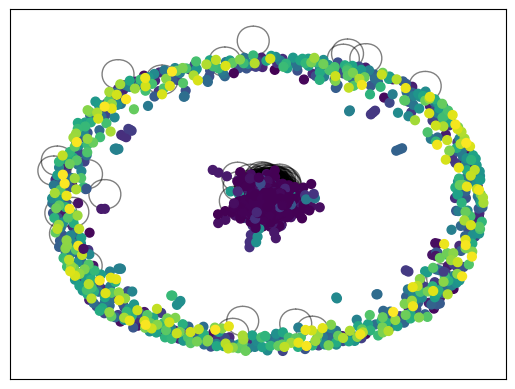

In [3]:
# Definicao de comunidades usando louvain, calculo do numero de comunidades,
# calculo do numero de nós por comunidade, e plot das comunidades

import community.community_louvain as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

file_path = "GraphMissingEdges.gml"
G = nx.read_gml(file_path)

num_nos = G.number_of_nodes()
print("Quantidade de nós no grafo:", num_nos)

partition = community_louvain.best_partition(G)

modularity = community_louvain.modularity(partition, G)
print("Modularidade da partição:", modularity)

num_comunidades = len(set(partition.values()))

comunidades = defaultdict(int)
for node, community_id in partition.items():
    comunidades[community_id] += 1

top_10_comunidades = sorted(comunidades.items(), key=lambda x: x[1], reverse=True)[:10]

print("Número de nós nas 10 maiores comunidades:")
for community_id, num_nodes in top_10_comunidades:
    print(f"Comunidade {community_id}: {num_nodes} nós")

pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.show()

Número de comunidades detectadas usando Louvain: 813
Quantidade de nós no grafo reduzido: 3219


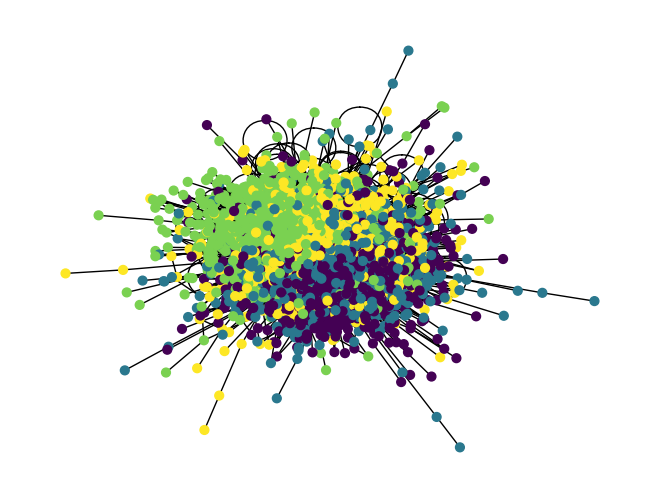

In [5]:
# Plot das 4 maiores comunidades - rede reduzida

print("Número de comunidades detectadas usando Louvain:", len(comunidades))

top_4_comunidades = sorted(comunidades.items(), key=lambda x: x[1], reverse=True)[:4]

nos_top_4_comunidades = set()
for community_id, _ in top_4_comunidades:
    nos_top_4_comunidades.update(node for node, cid in partition.items() if cid == community_id)

subgrafo = G.subgraph(nos_top_4_comunidades)

num_nos = subgrafo.number_of_nodes()
print("Quantidade de nós no grafo reduzido:", num_nos)

pos = nx.spring_layout(subgrafo)
nx.draw(subgrafo, pos, node_size=40, cmap=cmap, node_color=[partition[node] for node in subgrafo.nodes()])

plt.show()

In [54]:
import leidenalg as la
import igraph as ig
from collections import Counter

# converte o grafo networkx para igraph
G_igraph = ig.Graph.from_networkx(G)

partition = la.find_partition(G_igraph, la.ModularityVertexPartition)
print("Número de comunidades detectadas usando Leiden:", len(partition))

comunidades = partition.membership
comunidades_contagem = dict()
for c in set(comunidades):
    comunidades_contagem[c] = comunidades.count(c)

print(f"Modularidade: {partition.modularity}")

top_10_comunidades = sorted(comunidades_contagem.items(), key=lambda x: x[1], reverse=True)[:10]
print("Número de nós nas 10 maiores comunidades detectadas usando Leiden:")
for community_id, num_nodes in top_10_comunidades:
    print(f"Comunidade {community_id}: {num_nodes} nós")

ig.plot(partition) 

Número de comunidades detectadas usando Leiden: 814
Modularidade: 0.4215385000620567
Número de nós nas 10 maiores comunidades detectadas usando Leiden:
Comunidade 0: 911 nós
Comunidade 1: 900 nós
Comunidade 2: 750 nós
Comunidade 3: 574 nós
Comunidade 4: 113 nós
Comunidade 5: 76 nós
Comunidade 6: 59 nós
Comunidade 7: 43 nós
Comunidade 8: 42 nós
Comunidade 9: 36 nós


Quantidade de nós no grafo reduzido: 3135


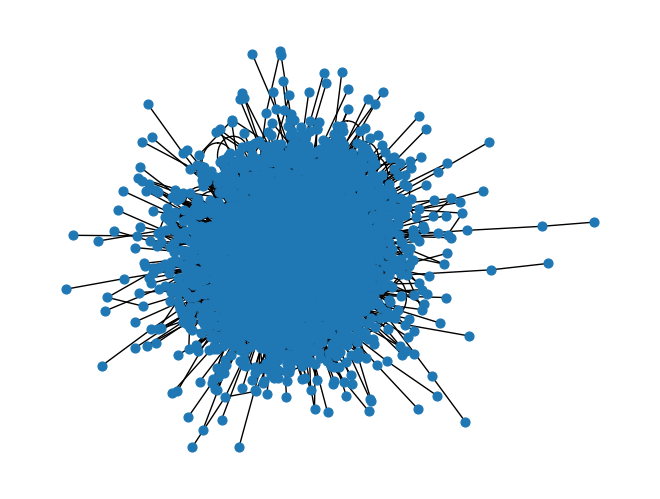

In [63]:
top_4_comunidades = sorted(((cid, set()) for cid in set(partition.membership)), key=lambda x: -len(partition[x[0]]))[:4]

nos_top_4_comunidades = set()
for cid, _ in top_4_comunidades:
    nos_top_4_comunidades.update(partition[cid])

subgrafo_igraph = ig.Graph.subgraph(ig.Graph.from_networkx(G), nos_top_4_comunidades)

subgrafo_nx = nx.Graph(subgrafo_igraph.get_edgelist())

num_nos = len(subgrafo_nx.nodes())
print("Quantidade de nós no grafo reduzido:", num_nos)

pos = nx.spring_layout(subgrafo_nx)
nx.draw(subgrafo_nx, pos, node_size=40, with_labels=False)

plt.show()